In [2]:
# Loading required libraries

import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [3]:
# Identify the URL

URL = 'https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops&requestId=46019d4a-7ca0-47df-abb2-12391aa3db52'

In [4]:
# Loading the WebPage in Memory using requests library

page = requests.get(URL)

In [5]:
# Check the Status Code of the Page

page.status_code

200

In [6]:
# Extracting the HTML Code of the WebPage

htmlCode = page.text
soup = BeautifulSoup(htmlCode)

In [7]:
htmlCode

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [8]:
# Price

price = soup.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})

print(price.text)

₹50,990


In [10]:
prices = soup.find_all('div', attrs = {'class' : '_30jeq3 _1_WHN1'})

for i in prices:
    print(i.text)

₹50,990
₹60,990
₹44,990
₹31,990
₹26,990
₹30,990
₹29,990
₹46,500
₹43,990
₹23,990
₹34,990
₹46,900
₹30,990
₹34,990
₹33,990
₹29,990
₹63,300
₹33,490
₹49,990
₹36,990
₹27,990
₹41,990
₹23,990
₹28,990


In [11]:
# Scrapping the Web Page

title = []
rating = []
price = []
features = []

for i in range(1, 27):
    URL = 'https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops&requestId=46019d4a-7ca0-47df-abb2-12391aa3db52&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_3pLy-c row'}):

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)

        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [12]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))

624
624
624
624


## Create a DataFrame and save it in CSV file

In [13]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})

In [14]:
df.head()

,Product,Rating,MRP,Feature
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G..."
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...


In [15]:
df.shape

(624, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  624 non-null    object
 1   Rating   581 non-null    object
 2   MRP      624 non-null    object
 3   Feature  624 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [17]:
df.to_csv('Laptop_Details.csv', index = False)

## Extracting the Details using Regex

In [18]:
import re

In [20]:
# print(df['Feature'][0])
# print(df['Feature'][2])
# print(df['Feature'][6])

In [21]:
df.head()

,Product,Rating,MRP,Feature
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G..."
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...


In [22]:
# Processor Information

regex = r'^[AMD|Intel][\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [23]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",[]
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,[]
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor]
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor]


In [24]:
# RAM Information

regex = r'[\d]+[\s]+GB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [25]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",[],[8 GB DDR4 RAM]
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,[],[4 GB LPDDR4 RAM]
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM]
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM]


In [27]:
#df['Feature'][0]
# df['Feature'][2]

In [28]:
import re

# Assuming 'df' is your DataFrame and 'Feature' is the column containing the information

# Define a regex pattern to match both operating system variations
regex = r'Windows 11 Operating System|64 bit Windows 11 Operating System'

# Function to extract OS information
def extract_os_info(text):
    matches = re.compile(regex).findall(text)
    if matches:
        return ', '.join(matches)
    else:
        return 'OS information not found'

# Apply the regex pattern to extract OS information
df['OS'] = df['Feature'].apply(extract_os_info)

In [29]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",[],[8 GB DDR4 RAM],64 bit Windows 11 Operating System
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,[],[4 GB LPDDR4 RAM],64 bit Windows 11 Operating System
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],Windows 11 Operating System
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System


In [30]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [31]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",[],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD]
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,[],[4 GB LPDDR4 RAM],64 bit Windows 11 Operating System,[128 GB SSD]
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD]
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD]
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[256 GB SSD]


In [32]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.compile(regex).findall(x))

In [33]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",[],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD],[CHUWI]
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,[],[4 GB LPDDR4 RAM],64 bit Windows 11 Operating System,[128 GB SSD],[CHUWI]
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],64 bit Windows 11 Operating System,[256 GB SSD],[ASUS]
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],Windows 11 Operating System,[512 GB SSD],[Lenovo]
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],Windows 11 Operating System,[256 GB SSD],[ASUS]


## Cleaning the Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    624 non-null    object
 1   Rating     581 non-null    object
 2   MRP        624 non-null    object
 3   Feature    624 non-null    object
 4   Processor  624 non-null    object
 5   RAM        624 non-null    object
 6   OS         624 non-null    object
 7   Storage    624 non-null    object
 8   Brand      624 non-null    object
dtypes: object(9)
memory usage: 44.0+ KB


In [35]:
# Missing Values

df.isnull().sum()

Product       0
Rating       43
MRP           0
Feature       0
Processor     0
RAM           0
OS            0
Storage       0
Brand         0
dtype: int64

In [37]:
print(df['Processor'][4])

print(type(df['Processor'][3]))

['Intel Celeron Dual Core Processor']
<class 'list'>


In [38]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [39]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,"₹18,990","Light weight, Portable Laptop\nRAM/Storage: 8G...",,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,"₹15,990",Fan-less Design\n(Low Power Consumption)4x fas...,,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,128 GB SSD,CHUWI
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,"₹30,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,ASUS
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,"₹46,765",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5 Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,"₹23,990",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,ASUS


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    624 non-null    object
 1   Rating     581 non-null    object
 2   MRP        624 non-null    object
 3   Feature    624 non-null    object
 4   Processor  624 non-null    object
 5   RAM        624 non-null    object
 6   OS         624 non-null    object
 7   Storage    624 non-null    object
 8   Brand      624 non-null    object
dtypes: object(9)
memory usage: 44.0+ KB


In [41]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [42]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,"Light weight, Portable Laptop\nRAM/Storage: 8G...",,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,15990.0,Fan-less Design\n(Low Power Consumption)4x fas...,,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,128 GB SSD,CHUWI
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,30990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,ASUS
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,46765.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5 Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,23990.0,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,ASUS


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    624 non-null    object 
 1   Rating     581 non-null    object 
 2   MRP        624 non-null    float64
 3   Feature    624 non-null    object 
 4   Processor  624 non-null    object 
 5   RAM        624 non-null    object 
 6   OS         624 non-null    object 
 7   Storage    624 non-null    object 
 8   Brand      624 non-null    object 
dtypes: float64(1), object(8)
memory usage: 44.0+ KB


In [48]:
df = df.drop('Feature', axis=1)

In [49]:
df.head()

,Product,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,15990.0,,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,128 GB SSD,CHUWI
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,30990.0,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,ASUS
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,46765.0,Intel Core i5 Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,23990.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,ASUS


In [50]:
df.isnull().sum()

Product       0
Rating       43
MRP           0
Processor     0
RAM           0
OS            0
Storage       0
Brand         0
dtype: int64

## Data Visualisation

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [56]:
df.head()

,Product,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990.0,,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,CHUWI
1,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.7,15990.0,,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,128 GB SSD,CHUWI
2,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,4.3,30990.0,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,ASUS
3,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.2,46765.0,Intel Core i5 Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
4,ASUS Vivobook Go 14 Intel Celeron Dual Core N4...,4.2,23990.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,ASUS


<AxesSubplot:xlabel='Brand', ylabel='MRP'>

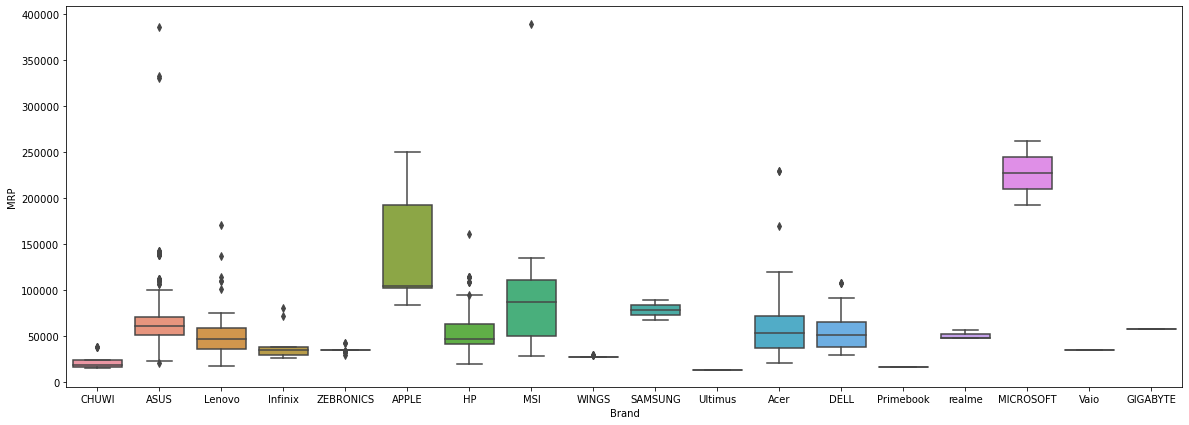

In [57]:
plt.figure(figsize=(20, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

In [ ]:
#observation:


C:\Users\V.MANOHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

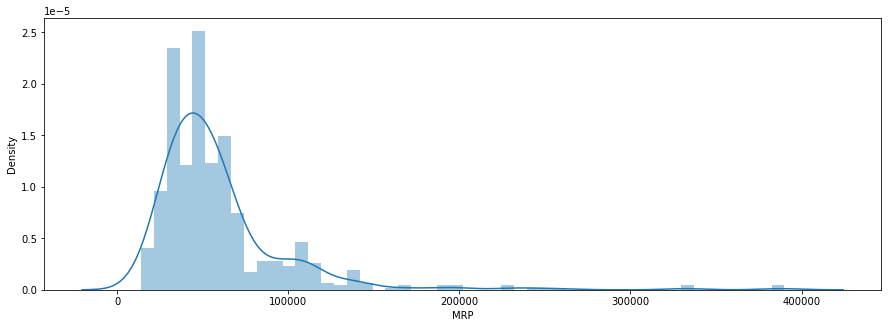

In [60]:
plt.figure(figsize=(15, 5))
sns.distplot(df.MRP)

C:\Users\V.MANOHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='count'>

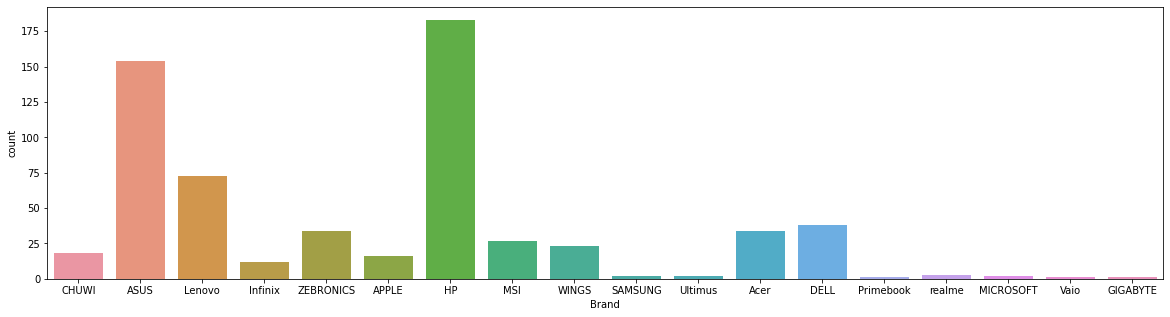

In [62]:
plt.figure(figsize=(20, 5))
sns.countplot(df.Brand)

In [63]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
APPLE       83990.0  249900.0  137586.875000
ASUS        20990.0  386391.0   71046.824675
Acer        20990.0  229991.0   67169.176471
CHUWI       15990.0   37990.0   23490.000000
DELL        29780.0  108000.0   55760.789474
GIGABYTE    57990.0   57990.0   57990.000000
HP          19990.0  160999.0   53625.278689
Infinix     26490.0   80990.0   40073.333333
Lenovo      17890.0  170990.0   52001.164384
MICROSOFT  192990.0  261990.0  227490.000000
MSI         28990.0  389990.0   90736.444444
Primebook   16990.0   16990.0   16990.000000
SAMSUNG     67990.0   89990.0   78990.000000
Ultimus     13990.0   13990.0   13990.000000
Vaio        35097.0   35097.0   35097.000000
WINGS       27990.0   29990.0   28337.826087
ZEBRONICS   29990.0   42990.0   35019.411765
realme      47999.0   56999.0   50999.000000

<AxesSubplot:xlabel='Brand'>

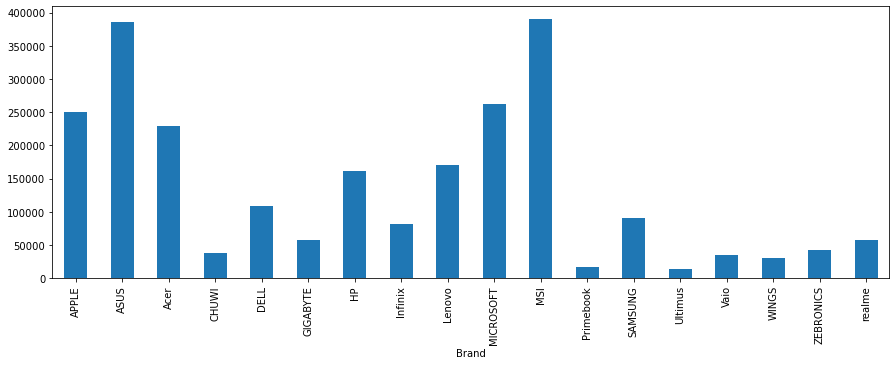

In [65]:
plt.figure(figsize=(15, 5))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='Brand'>

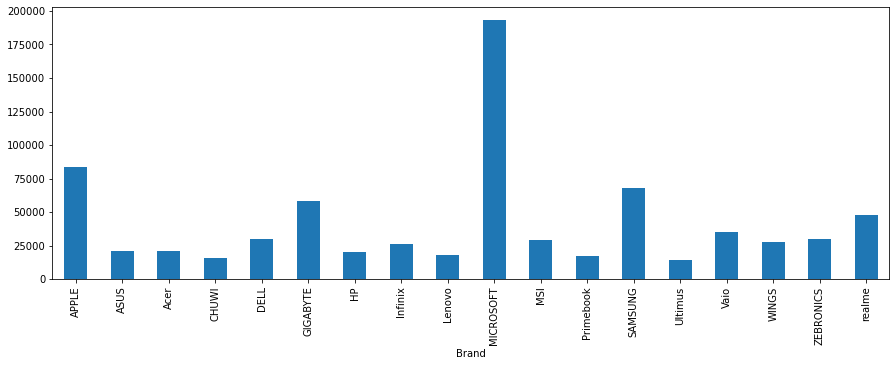

In [67]:
plt.figure(figsize=(15, 5))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')